In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind, f_oneway, pearsonr
from statsmodels.formula.api import ols
import statsmodels.api as sm

In [2]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)

In [3]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


In [4]:
boston_df.tail()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
501,501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67,22.4
502,502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,9.08,20.6
503,503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64,23.9
504,504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,6.48,22.0
505,505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,7.88,11.9


In [5]:
boston_df = boston_df.drop(columns=['Unnamed: 0'])

In [6]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


In [7]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  LSTAT    506 non-null    float64
 12  MEDV     506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [8]:
boston_df.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
LSTAT      float64
MEDV       float64
dtype: object

In [9]:
boston_df.shape

(506, 13)

In [10]:
boston_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


In [11]:
boston_df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,0.543993,-0.468536


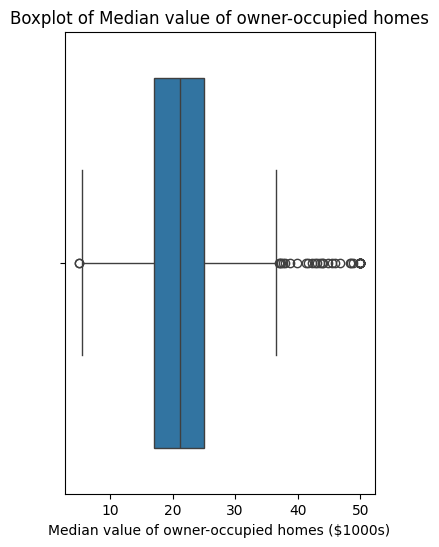

In [12]:
plt.figure(figsize=(4, 6))
sns.boxplot(x=boston_df['MEDV'])
plt.title('Boxplot of Median value of owner-occupied homes')
plt.xlabel('Median value of owner-occupied homes ($1000s)')
plt.show()


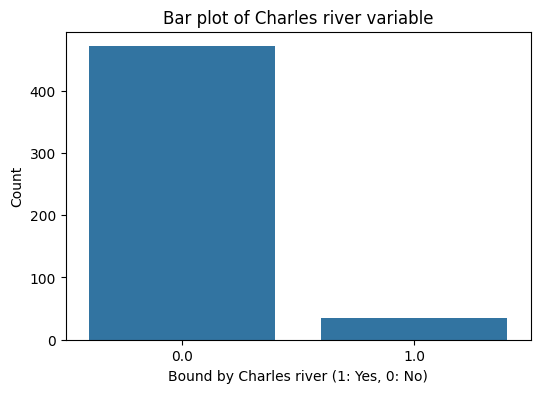

In [13]:
plt.figure(figsize=(6, 4))
sns.countplot(x='CHAS', data=boston_df)
plt.title('Bar plot of Charles river variable')
plt.xlabel('Bound by Charles river (1: Yes, 0: No)')
plt.ylabel('Count')
plt.show()

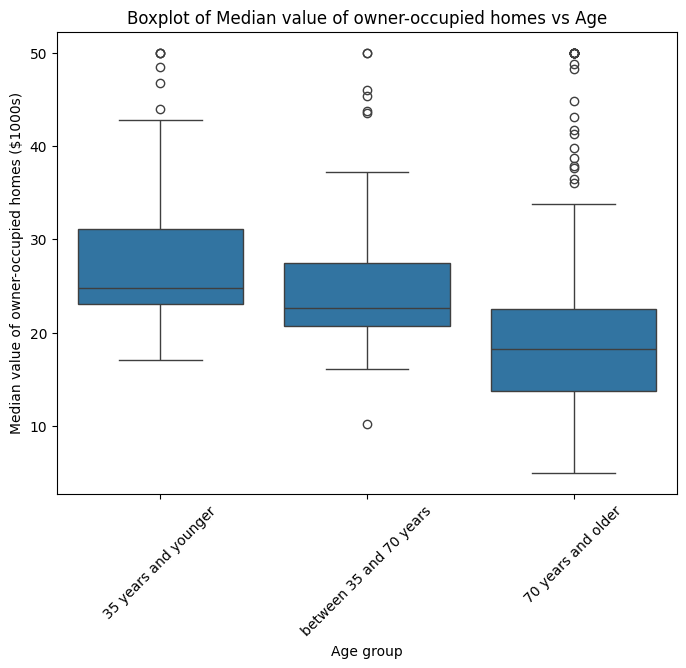

In [14]:
# Discretize the age variable into three groups
boston_df['AGE_group'] = pd.cut(boston_df['AGE'], bins=[0, 35, 70, np.inf], labels=['35 years and younger', 'between 35 and 70 years', '70 years and older'])

plt.figure(figsize=(8, 6))
sns.boxplot(x='AGE_group', y='MEDV', data=boston_df)
plt.title('Boxplot of Median value of owner-occupied homes vs Age')
plt.xlabel('Age group')
plt.ylabel('Median value of owner-occupied homes ($1000s)')
plt.xticks(rotation=45)
plt.show()


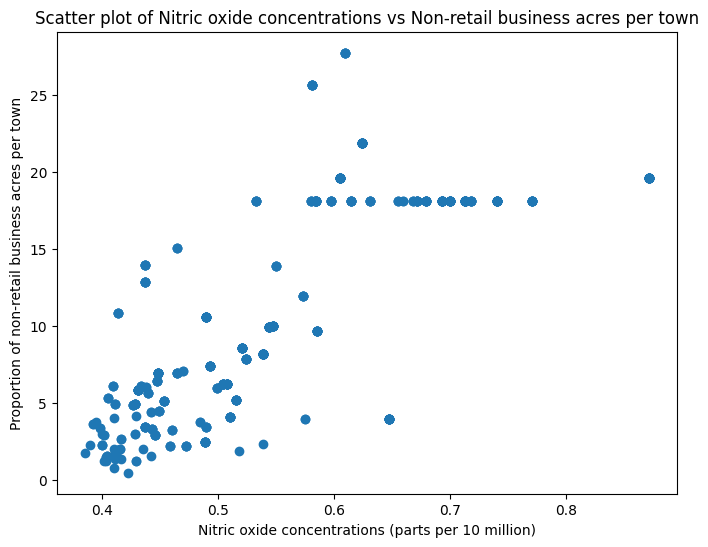

In [15]:
plt.figure(figsize=(8, 6))
plt.scatter(boston_df['NOX'], boston_df['INDUS'])
plt.title('Scatter plot of Nitric oxide concentrations vs Non-retail business acres per town')
plt.xlabel('Nitric oxide concentrations (parts per 10 million)')
plt.ylabel('Proportion of non-retail business acres per town')
plt.show()


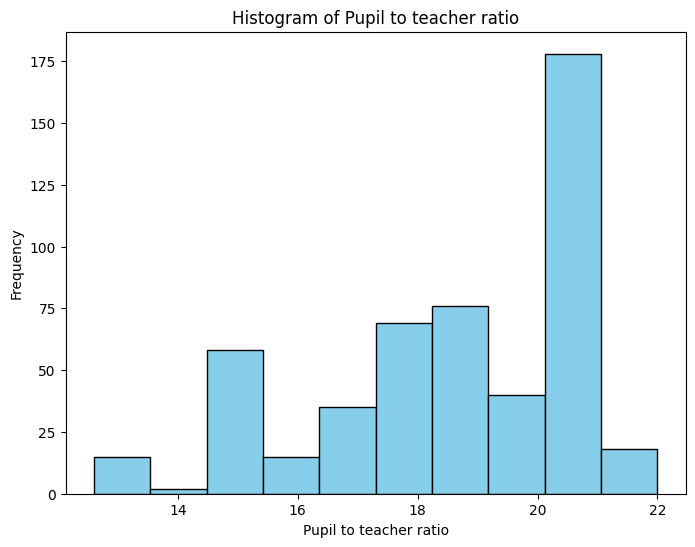

In [16]:
plt.figure(figsize=(8, 6))
plt.hist(boston_df['PTRATIO'], bins=10, color='skyblue', edgecolor='black')
plt.title('Histogram of Pupil to teacher ratio')
plt.xlabel('Pupil to teacher ratio')
plt.ylabel('Frequency')
plt.show()


In [17]:
# Separate data into two groups based on Charles river (0: Not bounded, 1: Bounded)
bounded = boston_df[boston_df['CHAS'] == 1]['MEDV']
not_bounded = boston_df[boston_df['CHAS'] == 0]['MEDV']

# Perform t-test
t_statistic, p_value = ttest_ind(bounded, not_bounded)

print("T-statistic:", t_statistic)
print("P-value:", p_value)

alpha = 0.05
if p_value < alpha:
    print("Reject Null Hypothesis: There is a significant difference in median value of houses bounded by the Charles river and those not bounded by the river.")
else:
    print("Fail to Reject Null Hypothesis: There is no significant difference in median value of houses bounded by the Charles river and those not bounded by the river.")


T-statistic: 3.996437466090509
P-value: 7.390623170519905e-05
Reject Null Hypothesis: There is a significant difference in median value of houses bounded by the Charles river and those not bounded by the river.


In [18]:
# Perform ANOVA
result = ols('MEDV ~ C(AGE_group)', data=boston_df).fit()
anova_table = sm.stats.anova_lm(result, typ=2)

print(anova_table)

p_value_anova = anova_table['PR(>F)'][0]

alpha = 0.05
if p_value_anova < alpha:
    print("Reject Null Hypothesis: There is a significant difference in median values of houses for at least one proportion of owner occupied units built prior to 1940.")
else:
    print("Fail to Reject Null Hypothesis: There is no significant difference in median values of houses for each proportion of owner occupied units built prior to 1940.")


                    sum_sq     df         F        PR(>F)
C(AGE_group)   5401.731883    2.0  36.40765  1.710501e-15
Residual      37314.563532  503.0       NaN           NaN
Reject Null Hypothesis: There is a significant difference in median values of houses for at least one proportion of owner occupied units built prior to 1940.


C:\Users\USER\AppData\Local\Temp\ipykernel_8652\325443091.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_value_anova = anova_table['PR(>F)'][0]


In [19]:
# Perform Pearson correlation
correlation, p_value_corr = pearsonr(boston_df['NOX'], boston_df['INDUS'])

print("Correlation coefficient:", correlation)
print("P-value:", p_value_corr)

alpha = 0.05
if p_value_corr < alpha:
    print("Reject Null Hypothesis: There is a relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.")
else:
    print("Fail to Reject Null Hypothesis: There is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.")


Correlation coefficient: 0.7636514469209156
P-value: 7.91336106123623e-98
Reject Null Hypothesis: There is a relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.


In [20]:
# Perform regression analysis
result_regression = ols('MEDV ~ DIS', data=boston_df).fit()

print(result_regression.summary())

p_value_regression = result_regression.pvalues['DIS']

alpha = 0.05
if p_value_regression < alpha:
    print("Reject Null Hypothesis: The weighted distance to the five Boston employment centres has an impact on the median value of owner occupied homes.")
else:
    print("Fail to Reject Null Hypothesis: The weighted distance to the five Boston employment centres has no impact on the median value of owner occupied homes.")

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Thu, 25 Apr 2024   Prob (F-statistic):           1.21e-08
Time:                        00:14:08   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     18.3901      0.817     22.499      0.0